<a href="https://colab.research.google.com/github/Vishnup211/SuperStore_DataSet/blob/main/Super_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Superstore Sales**

Retail dataset of a global superstore for 4 years.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/train.csv')

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
if 'Unnamed: 0' in df.columns:
    del df["Unnamed: 0"]
    print("Column 'Unnamed: 0' deleted successfully.")
else:
    print("Column 'Unnamed: 0' not found in the DataFrame.")

# Display first two rows
df.head(2)

Column 'Unnamed: 0' not found in the DataFrame.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [5]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
df.shape

(9800, 18)

In [8]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [27]:
df.duplicated().sum()

1

In [28]:
# Show the duplicated rows
df[df.duplicated(keep = 'last')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3405,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [29]:
df.drop_duplicates(inplace = True)

In [30]:
df.shape

(9799, 16)

# **Data Cleaning And Trimming**

In [9]:
row_size=df.shape[0]
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(i,"------------",(df[i].isnull().sum()/row_size)*100)

Postal Code ------------ 0.11224489795918367


In [10]:
df.duplicated().sum()

0

In [12]:
df.shape

(9800, 18)

In [13]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Replace the missing value with the postal code of that city

In [15]:
df[df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [31]:
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0
Postal Code,11


In [16]:
df['Postal Code'].value_counts()

,count
Postal Code,
10035.0,253
10024.0,225
10009.0,220
94122.0,195
10011.0,193
94110.0,166
98105.0,165
19134.0,160
90049.0,150


In [17]:
# duplicates
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [18]:
#Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
df['Country'].value_counts()

,count
Country,
United States,9800


Drop the irrelevent columns
Row ID ,
Order ID ,
Customer ID ,
Customer Name ,
Country .

Here the Country is united States So dropping the country Coloumn

In [20]:
df=df.drop('Country',axis=1)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [40]:
df = df.drop('Order ID', axis=1)
df = df.drop('Customer ID', axis=1)
df = df.drop('Customer Name', axis=1)

In [41]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


All the dates related data convert into the date time format (df_datetime)

In [50]:
df = pd.DataFrame(df)

# Use the correct format string for your dates
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') # Changed format string
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') # Changed format string


print(df.dtypes)
print(df.head())

Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Segment                 object
City                    object
State                   object
Postal Code            float64
Region                  object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Cost                   float64
Profit                 float64
dtype: object
  Order Date  Ship Date       Ship Mode    Segment             City  \
0 2017-11-08 2017-11-11    Second Class   Consumer        Henderson   
1 2017-11-08 2017-11-11    Second Class   Consumer        Henderson   
2 2017-06-12 2017-06-16    Second Class  Corporate      Los Angeles   
3 2016-10-11 2016-10-18  Standard Class   Consumer  Fort Lauderdale   
4 2016-10-11 2016-10-18  Standard Class   Consumer  Fort Lauderdale   

        State  Postal Code Region       Product ID         Category  \
0    Kentucky      4242

In [51]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Cost,Profit
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,157.1760,104.7840
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,439.1640,292.7760
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,8.7720,5.8480
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,574.5465,383.0310
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,13.4208,8.9472


# 2 . Checking the Product Catogories

In [21]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [23]:
df['Category'].value_counts()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


In [24]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [25]:
df['Sub-Category'].nunique()

17

In [26]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,607
Appliances,459


# 3.Products

In [35]:
df['Product Name'].nunique()

1849

In [36]:
df['Product Name'].value_counts()

,count
Product Name,
Staple envelope,47
Staples,46
Easy-staple paper,44
Avery Non-Stick Binders,20
Staples in misc. colors,18
Staple remover,18
Storex Dura Pro Binders,17
KI Adjustable-Height Table,17
Staple-based wall hangings,16


# 4.Cost & Sales

Creating some new coloums to understand Cost , Profit


In [46]:
df = pd.DataFrame(df)

# Simulating a cost column (for demonstration only)
df['Cost'] = df['Sales'] * 0.6

# Calculate Profit
df['Profit'] = df['Sales'] - df['Cost']

# Display the DataFrame
print(df)

      Order Date   Ship Date       Ship Mode    Segment             City  \
0     08/11/2017  11/11/2017    Second Class   Consumer        Henderson   
1     08/11/2017  11/11/2017    Second Class   Consumer        Henderson   
2     12/06/2017  16/06/2017    Second Class  Corporate      Los Angeles   
3     11/10/2016  18/10/2016  Standard Class   Consumer  Fort Lauderdale   
4     11/10/2016  18/10/2016  Standard Class   Consumer  Fort Lauderdale   
...          ...         ...             ...        ...              ...   
9795  21/05/2017  28/05/2017  Standard Class  Corporate          Chicago   
9796  12/01/2016  17/01/2016  Standard Class  Corporate           Toledo   
9797  12/01/2016  17/01/2016  Standard Class  Corporate           Toledo   
9798  12/01/2016  17/01/2016  Standard Class  Corporate           Toledo   
9799  12/01/2016  17/01/2016  Standard Class  Corporate           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Ken

In [48]:
# Assuming 'Profit' is a typo and should be 'profit' (case sensitive)
df['Cost'] = df['Sales']- df['Profit']
df['Cost'].head()

,Cost
0,157.1760
1,439.1640
2,8.7720
3,574.5465
4,13.4208


Descriptive Statistics:
Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).


In [52]:
df = pd.DataFrame(df)

# Calculate descriptive statistics for numeric columns
descriptive_stats = df.describe()

# Display the descriptive statistics
print(descriptive_stats)

                          Order Date                      Ship Date  \
count                           9799                           9799   
mean   2017-05-01 07:02:29.525461760  2017-05-05 06:06:30.162261504   
min              2015-01-03 00:00:00            2015-01-07 00:00:00   
25%              2016-05-24 12:00:00            2016-05-28 00:00:00   
50%              2017-06-26 00:00:00            2017-06-29 00:00:00   
75%              2018-05-15 00:00:00            2018-05-19 00:00:00   
max              2018-12-30 00:00:00            2019-01-05 00:00:00   
std                              NaN                            NaN   

        Postal Code         Sales          Cost       Profit  
count   9788.000000   9799.000000   9799.000000  9799.000000  
mean   55274.552922    230.763895    138.458337    92.305558  
min     1040.000000      0.444000      0.266400     0.177600  
25%    23223.000000     17.248000     10.348800     6.899200  
50%    58103.000000     54.480000     32.6880

# Questions


# Top 15 Cities

In [53]:
city_sales = df.groupby('City')['Sales'].sum()

top_cities = city_sales.sort_values(ascending=False)

top_15_cities = top_cities.head(15)

print(top_15_cities)

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Springfield       41827.8100
Columbus          38381.1910
Newark            28448.0490
Columbia          25283.3240
Jackson           24963.8580
Name: Sales, dtype: float64


Location from where you are getting the most orders?

In [74]:
# Count the number of orders by city
city_order_counts = df.groupby('City')['Order Date'].count()
city_order_counts = city_order_counts.sort_values(ascending=False)
print("City with the most orders:\n", city_order_counts)


City with the most orders:
 City
New York City     891
Los Angeles       728
Philadelphia      532
San Francisco     500
Seattle           426
                 ... 
Keller              1
Jupiter             1
Jefferson City      1
Springdale          1
Aberdeen            1
Name: Order Date, Length: 529, dtype: int64


By state



In [75]:

state_order_counts = df.groupby('State')['Order Date'].count()
state_order_counts = state_order_counts.sort_values(ascending=False)
print("State with the most orders:\n", state_order_counts)


State with the most orders:
 State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     453
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisian

Which ship mode is mostly used?

In [76]:
ship_mode_counts = df['Ship Mode'].value_counts()
print("Ship Mode Counts:\n", ship_mode_counts)

Ship Mode Counts:
 Ship Mode
Standard Class    5858
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


From which reason we got more sales?

In [77]:

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Sales by Category:\n", category_sales)

Sales by Category:
 Category
Technology         827455.8730
Furniture          728377.2037
Office Supplies    705422.3340
Name: Sales, dtype: float64


Which segmenet has more sales?



In [79]:

segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("Sales by Segment:\n", segment_sales)

Sales by Segment:
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.247008e+05
Name: Sales, dtype: float64


Which customer brought more producets?

In [80]:
product_counts = df['City'].value_counts()
print("Number of Products Purchased by City:\n", product_counts)

Number of Products Purchased by City:
 City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64


Revenue per customer

In [82]:
revenue_per_customer = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print("Revenue per Customer (by Customer ID):\n", revenue_per_customer)


Revenue per Customer (by Customer ID):
 City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 529, dtype: float64


# Pie Chart

Shipment Mode Vs Sales

Ship Mode
Standard Class    1.340550e+06
Second Class      4.499142e+05
First Class       3.455723e+05
Same Day          1.252190e+05
Name: Sales, dtype: float64


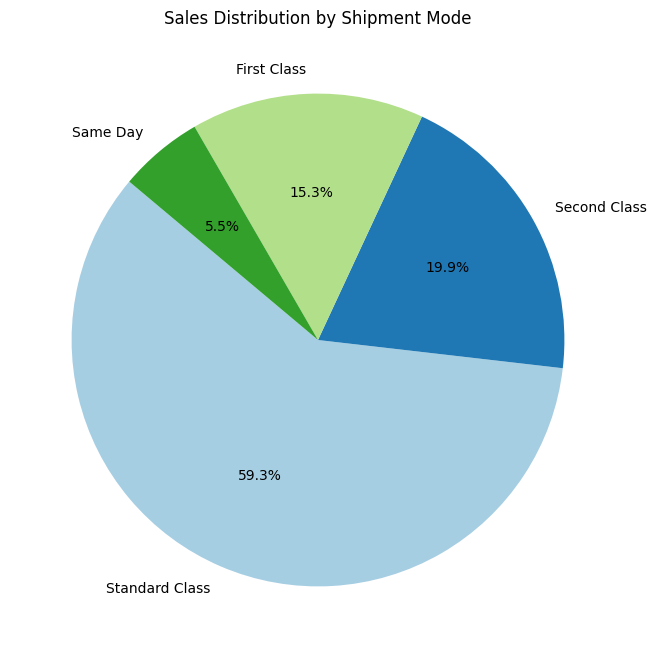

In [64]:
sales_by_mode = df.groupby('Ship Mode')['Sales'].sum()
sales_by_mode = sales_by_mode.sort_values(ascending=False)
print(sales_by_mode)

plt.figure(figsize=(8, 8))
plt.pie(sales_by_mode, labels=sales_by_mode.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(sales_by_mode))), startangle=140)

plt.title('Sales Distribution by Shipment Mode')
plt.show()

Segment vs Sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.247008e+05
Name: Sales, dtype: float64


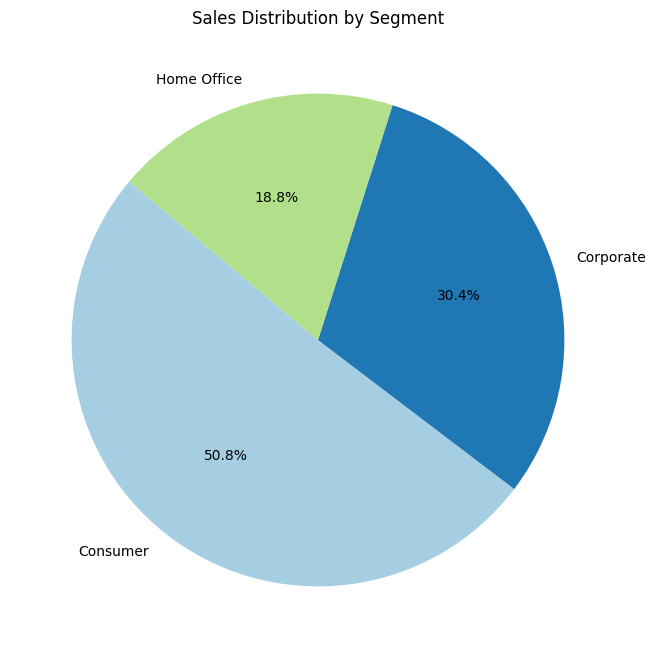

In [65]:
seg=df.groupby('Segment')['Sales'].sum()
seg=seg.sort_values(ascending=False)
print(seg)
plt.figure(figsize=(8, 8))
plt.pie(seg, labels=seg.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(seg))), startangle=140)

plt.title('Sales Distribution by Segment')
plt.show()

Category vs Sales

Category
Technology         827455.8730
Furniture          728377.2037
Office Supplies    705422.3340
Name: Sales, dtype: float64


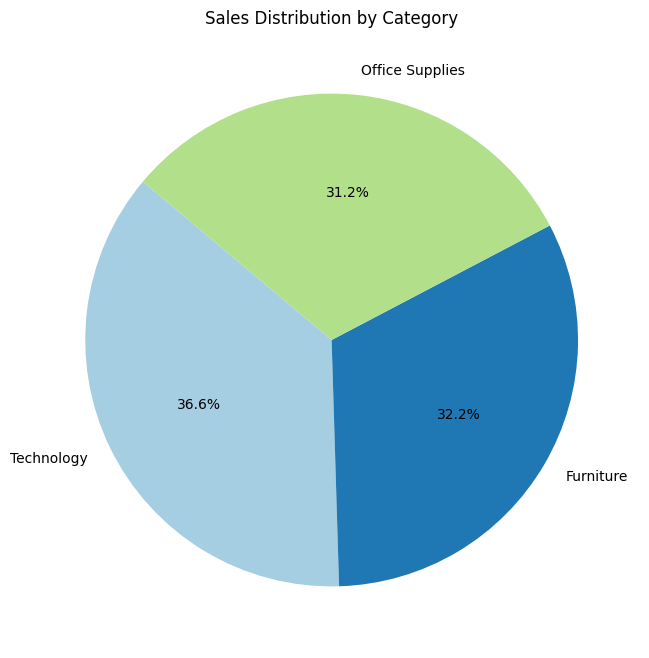

In [67]:
cat=df.groupby('Category')['Sales'].sum()
cat=cat.sort_values(ascending=False)
print(cat)
plt.figure(figsize=(8, 8))
plt.pie(cat, labels=cat.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(cat))), startangle=140)

plt.title('Sales Distribution by Category')
plt.show()

Sub-Category vs Sales

Sub-Category
Phones         327782.4480
Chairs         322541.3590
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


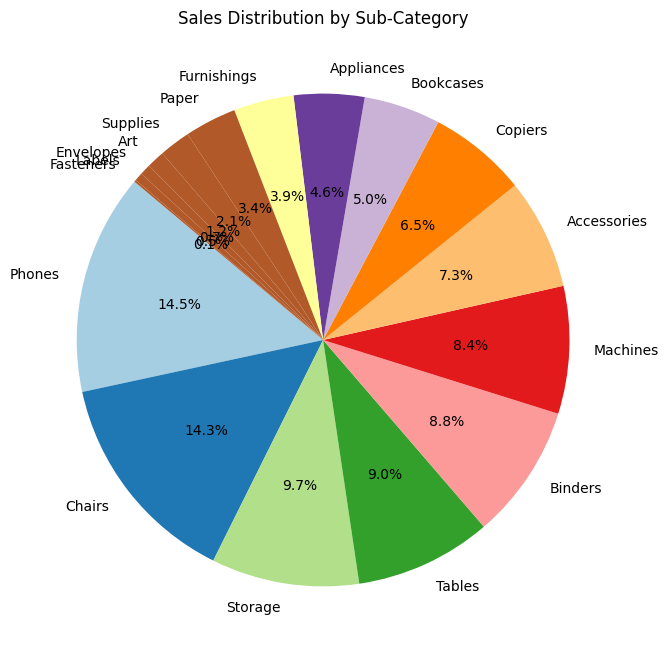

In [68]:
scat=df.groupby('Sub-Category')['Sales'].sum()
scat=scat.sort_values(ascending=False)
print(scat)
plt.figure(figsize=(10, 8))
plt.pie(scat, labels=scat.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(scat))), startangle=140)

plt.title('Sales Distribution by Sub-Category')
plt.show()

Region vs Sales

In [59]:
regs=df.groupby('Region')['Sales'].sum()
regs=regs.sort_values(ascending=False)
print(regs)

Region
West       710219.6845
East       669237.3540
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


In [71]:
#City vs Product
cpr=df.groupby(['City','Product Name'])['Sales'].sum()
cpr=cpr.sort_values(ascending=False)
print(cpr)



City           Product Name                                                              
Jacksonville   Cisco TelePresence System EX90 Videoconferencing Unit                         22638.480
Lafayette      Canon imageCLASS 2200 Advanced Copier                                         17499.950
Seattle        Canon imageCLASS 2200 Advanced Copier                                         13999.960
San Francisco  High Speed Automatic Electric Letter Opener                                   13100.240
New York City  Canon imageCLASS 2200 Advanced Copier                                         11199.968
                                                                                               ...    
Huntsville     Avery Non-Stick Binders                                                           0.898
Mesquite       Acco 3-Hole Punch                                                                 0.876
Chicago        Avery Durable Slant Ring Binders With Label Holder                     